Attempting to predict total volume of avocado sales given data about region, price, and date. Data from https://www.kaggle.com/datasets/neuromusic/avocado-prices

In [1]:
import csv
import pandas as pd

#Data Import and Encoding

In [69]:
df = pd.read_csv('/content/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [70]:
df.drop(columns=['Unnamed: 0', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], inplace=True)
df.head()

,Date,AveragePrice,Total Volume,type,year,region
0,2015-12-27,1.33,64236.62,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,conventional,2015,Albany


In [71]:
Xa = df[[col for col in df.columns if col != 'Total Volume']]
y = df['Total Volume']

In [72]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(Xa[['type', 'region']])
dfa = enc.transform(Xa[['type', 'region']])

dfa

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 1., 53.],
       [ 1., 53.],
       [ 1., 53.]])

In [73]:
# rejoin all columns

dfa = pd.DataFrame(dfa)
dfa.rename(columns = {0:'type', 1:'region_num'}, inplace=True)
dfa.tail()

dfb = df[['Date', 'AveragePrice', 'Total Volume',	'year', 'region']]
dfb.head()

dfencoded = pd.concat([dfa, dfb], axis=1)

In [74]:
dfencoded['Date'] = pd.to_datetime(dfencoded['Date'])
dfencoded.head()

,type,region_num,Date,AveragePrice,Total Volume,year,region
0,0.0,0.0,2015-12-27,1.33,64236.62,2015,Albany
1,0.0,0.0,2015-12-20,1.35,54876.98,2015,Albany
2,0.0,0.0,2015-12-13,0.93,118220.22,2015,Albany
3,0.0,0.0,2015-12-06,1.08,78992.15,2015,Albany
4,0.0,0.0,2015-11-29,1.28,51039.60,2015,Albany


In [75]:
dfencoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          18249 non-null  float64       
 1   region_num    18249 non-null  float64       
 2   Date          18249 non-null  datetime64[ns]
 3   AveragePrice  18249 non-null  float64       
 4   Total Volume  18249 non-null  float64       
 5   year          18249 non-null  int64         
 6   region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 998.1+ KB


In [76]:
list(enc.categories_)

[array(['conventional', 'organic'], dtype=object),
 array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)]

In [78]:
dfencoded.shape

(18249, 7)

In [102]:
dfdropped = dfencoded[(dfencoded.region != 'TotalUS') &
                      (dfencoded.region != 'West') & 
                      (dfencoded.region != 'Southeast') & 
                      (dfencoded.region != 'SouthCentral') & 
                      (dfencoded.region != 'Plains') & 
                      (dfencoded.region != 'Midsouth') &
                      (dfencoded.region != 'Northeast') &
                      (dfencoded.region != 'GreatLakes')]

dfdropped.shape

(15545, 7)

In [103]:
X = dfdropped[[col for col in dfdropped.columns if col != 'Total Volume']]
y = dfdropped['Total Volume']

In [104]:
X

,type,region_num,Date,AveragePrice,year,region
0,0.0,0.0,2015-12-27,1.33,2015,Albany
1,0.0,0.0,2015-12-20,1.35,2015,Albany
2,0.0,0.0,2015-12-13,0.93,2015,Albany
3,0.0,0.0,2015-12-06,1.08,2015,Albany
4,0.0,0.0,2015-11-29,1.28,2015,Albany
...,...,...,...,...,...,...
18244,1.0,53.0,2018-02-04,1.63,2018,WestTexNewMexico
18245,1.0,53.0,2018-01-28,1.71,2018,WestTexNewMexico
18246,1.0,53.0,2018-01-21,1.87,2018,WestTexNewMexico
18247,1.0,53.0,2018-01-14,1.93,2018,WestTexNewMexico


In [105]:
X2 = X[[col for col in X.columns if col != 'Date']]

In [111]:
X3 = X2[[col for col in X2.columns if col != 'region']]

In [ ]:
X2

In [118]:
X3

,type,region_num,AveragePrice,year
0,0.0,0.0,1.33,2015
1,0.0,0.0,1.35,2015
2,0.0,0.0,0.93,2015
3,0.0,0.0,1.08,2015
4,0.0,0.0,1.28,2015
...,...,...,...,...
18244,1.0,53.0,1.63,2018
18245,1.0,53.0,1.71,2018
18246,1.0,53.0,1.87,2018
18247,1.0,53.0,1.93,2018


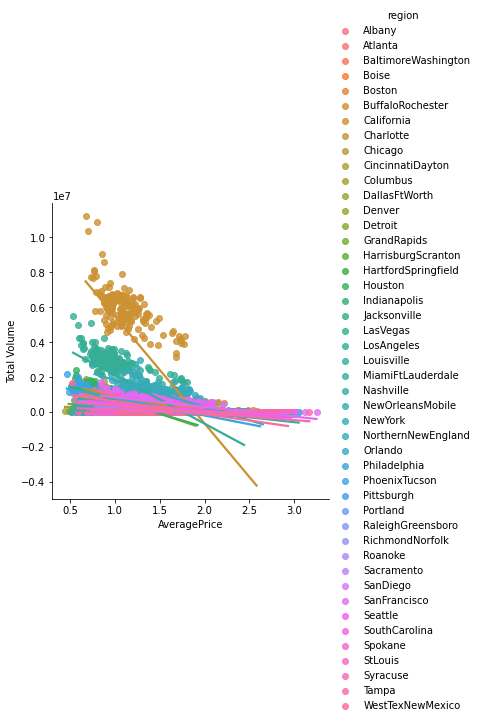

In [107]:
import seaborn as sns

sns.lmplot(x='AveragePrice', y='Total Volume', data=dfdropped, hue="region", ci = None)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X3, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.19295658911905478

#Modeling with only California

In [136]:
dfcal = dfencoded[(dfencoded.region_num == 6.0)]

In [137]:
dfcal = dfcal.drop(columns = ['Date', 'region'])

In [138]:
Xcal = dfcal[[col for col in dfcal.columns if col != 'Total Volume']]
ycal = dfcal['Total Volume']

In [139]:
Xcal

,type,region_num,AveragePrice,year
312,0.0,6.0,0.90,2015
313,0.0,6.0,0.94,2015
314,0.0,6.0,0.87,2015
315,0.0,6.0,0.78,2015
316,0.0,6.0,0.91,2015
...,...,...,...,...
17680,1.0,6.0,1.56,2018
17681,1.0,6.0,1.87,2018
17682,1.0,6.0,1.69,2018
17683,1.0,6.0,1.61,2018


In [144]:
Xcal_train, Xcal_test, ycal_train, ycal_test = tts(Xcal, ycal, test_size=0.2)

modelcal = LinearRegression()
modelcal.fit(Xcal_train, ycal_train)
modelcal.score(Xcal_test, ycal_test)

0.9247369987904748